# Feature Engineering

-   Create new features based on insights from EDA
-   Handle categorical variables (encoding)
-   Normalize or standardize numerical features
-   Feature selection

## Feature Ideas


In [82]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np

# Add the project root to the Python path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from src.features.preprocessing import (
    preprocess_data,
    engineer_features,
    select_features
)
from src.features.feature_eng import *

from src.visualization.distribution_plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Load the data
df_all_years = pd.read_parquet('../data/02_interim/df_all_years.parquet')
df_2016_plus = pd.read_parquet('../data/02_interim/df_2016_plus.parquet')

In [44]:
def process_and_analyze_df(df, df_name):
    # Engineer features
    df_engineered = engineer_features(df)

    # Select all features
    df_selected = select_features(df_engineered)

    # Preprocess the data (this combines engineering and selection)
    df_preprocessed = preprocess_data(df)

    return df_preprocessed

In [94]:
# Process and analyze each DataFrame
df_all_years_preprocessed = process_and_analyze_df(df_all_years, "All Years Data")
df_2016_plus_preprocessed = process_and_analyze_df(df_2016_plus, "2016+ Data")

Calculating feature: win_rate_last_5
Calculating win rate for last 5 games
Win rate calculation complete. Shape: (3067604,)
Feature win_rate_last_5 shape: (3067604,)
Calculating feature: win_rate_last_10
Calculating win rate for last 10 games
Win rate calculation complete. Shape: (3067604,)
Feature win_rate_last_10 shape: (3067604,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (16438,)
Feature win_rate_season shape: (16438,)
Calculating feature: points_scored_last_3
Calculating total points for last 3 games using stat: team_points
Feature points_scored_last_3 shape: (16438,)
Calculating feature: points_allowed_last_3
Calculating total points for last 3 games using stat: opponent_points
Feature points_allowed_last_3 shape: (16438,)
Calculating feature: point_differential_season_avg
Feature point_differential_season_avg shape: (16438,)
Calculating feature: point_differential_season_cumulative
Feature point_differential_seas

In [43]:
# Save the preprocessed data
output_path_all_years = '../data/03_processed/preprocessed_all_years.parquet'
output_path_2016_plus = '../data/03_processed/preprocessed_2016_plus.parquet'

df_all_years_preprocessed.to_parquet(output_path_all_years, index=False)
df_2016_plus_preprocessed.to_parquet(output_path_2016_plus, index=False)

print(f"\nPreprocessed all years data saved to: {output_path_all_years}")
print(f"Preprocessed 2016+ data saved to: {output_path_2016_plus}")



Preprocessed all years data saved to: ../data/03_processed/preprocessed_all_years.parquet
Preprocessed 2016+ data saved to: ../data/03_processed/preprocessed_2016_plus.parquet


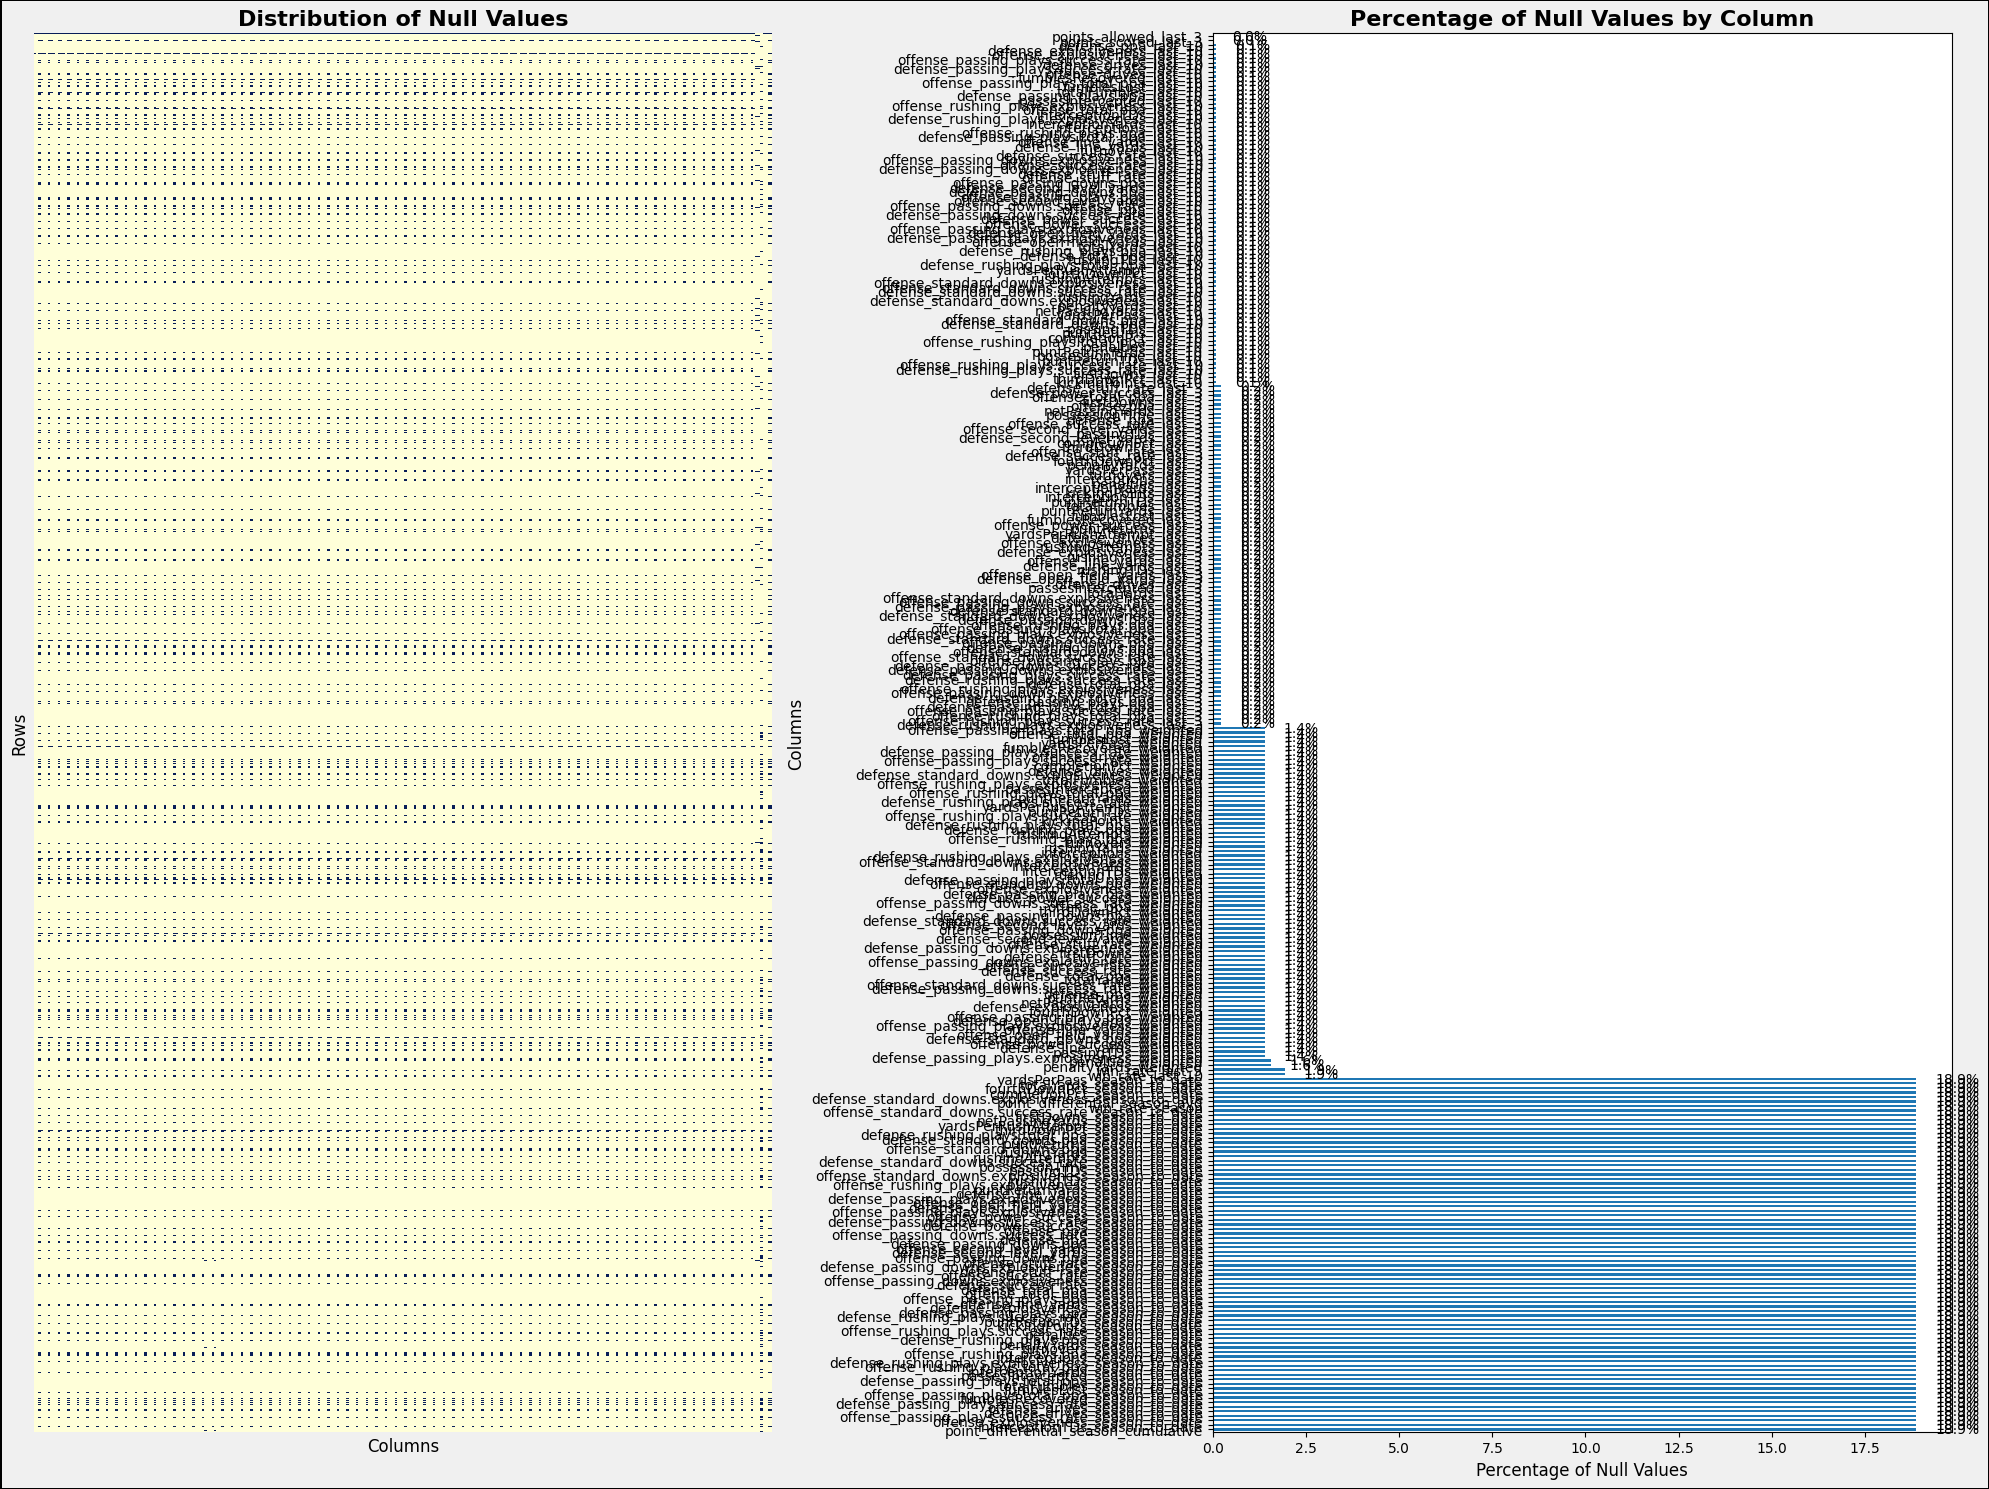

Columns with null values (sorted by percentage, descending):
point_differential_season_cumulative: 3104 null values (18.88%)
interceptionTDs_season_to_date: 3104 null values (18.88%)
offense_explosiveness_season_to_date: 3104 null values (18.88%)
offense_passing_plays.success_rate_season_to_date: 3104 null values (18.88%)
defense_drives_season_to_date: 3104 null values (18.88%)
offense_drives_season_to_date: 3104 null values (18.88%)
defense_passing_plays.success_rate_season_to_date: 3104 null values (18.88%)
fumblesRecovered_season_to_date: 3104 null values (18.88%)
offense_passing_plays.total_ppa_season_to_date: 3104 null values (18.88%)
fumblesLost_season_to_date: 3104 null values (18.88%)
totalFumbles_season_to_date: 3104 null values (18.88%)
defense_passing_plays.total_ppa_season_to_date: 3104 null values (18.88%)
passesIntercepted_season_to_date: 3104 null values (18.88%)
interceptionYards_season_to_date: 3104 null values (18.88%)
offense_rushing_plays.total_ppa_season_to_date: 3

In [95]:
visualize_null_values(df_all_years_preprocessed)

In [98]:
# Sort df_all_years by start_date in descending order and take the latest 500 rows
df_random = df_all_years.sort_values('start_date', ascending=False).head(500).reset_index(drop=True)

In [99]:
df_random_preprocessed = process_and_analyze_df(df_random, "Random")

Calculating feature: win_rate_last_5
Calculating win rate for last 5 games
Win rate calculation complete. Shape: (500,)
Feature win_rate_last_5 shape: (500,)
Calculating feature: win_rate_last_10
Calculating win rate for last 10 games
Win rate calculation complete. Shape: (500,)
Feature win_rate_last_10 shape: (500,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (500,)
Feature win_rate_season shape: (500,)
Calculating feature: points_scored_last_3
Calculating total points for last 3 games using stat: team_points
Feature points_scored_last_3 shape: (500,)
Calculating feature: points_allowed_last_3
Calculating total points for last 3 games using stat: opponent_points
Feature points_allowed_last_3 shape: (500,)
Calculating feature: point_differential_season_avg
Feature point_differential_season_avg shape: (500,)
Calculating feature: point_differential_season_cumulative
Feature point_differential_season_cumulative shape: (500,

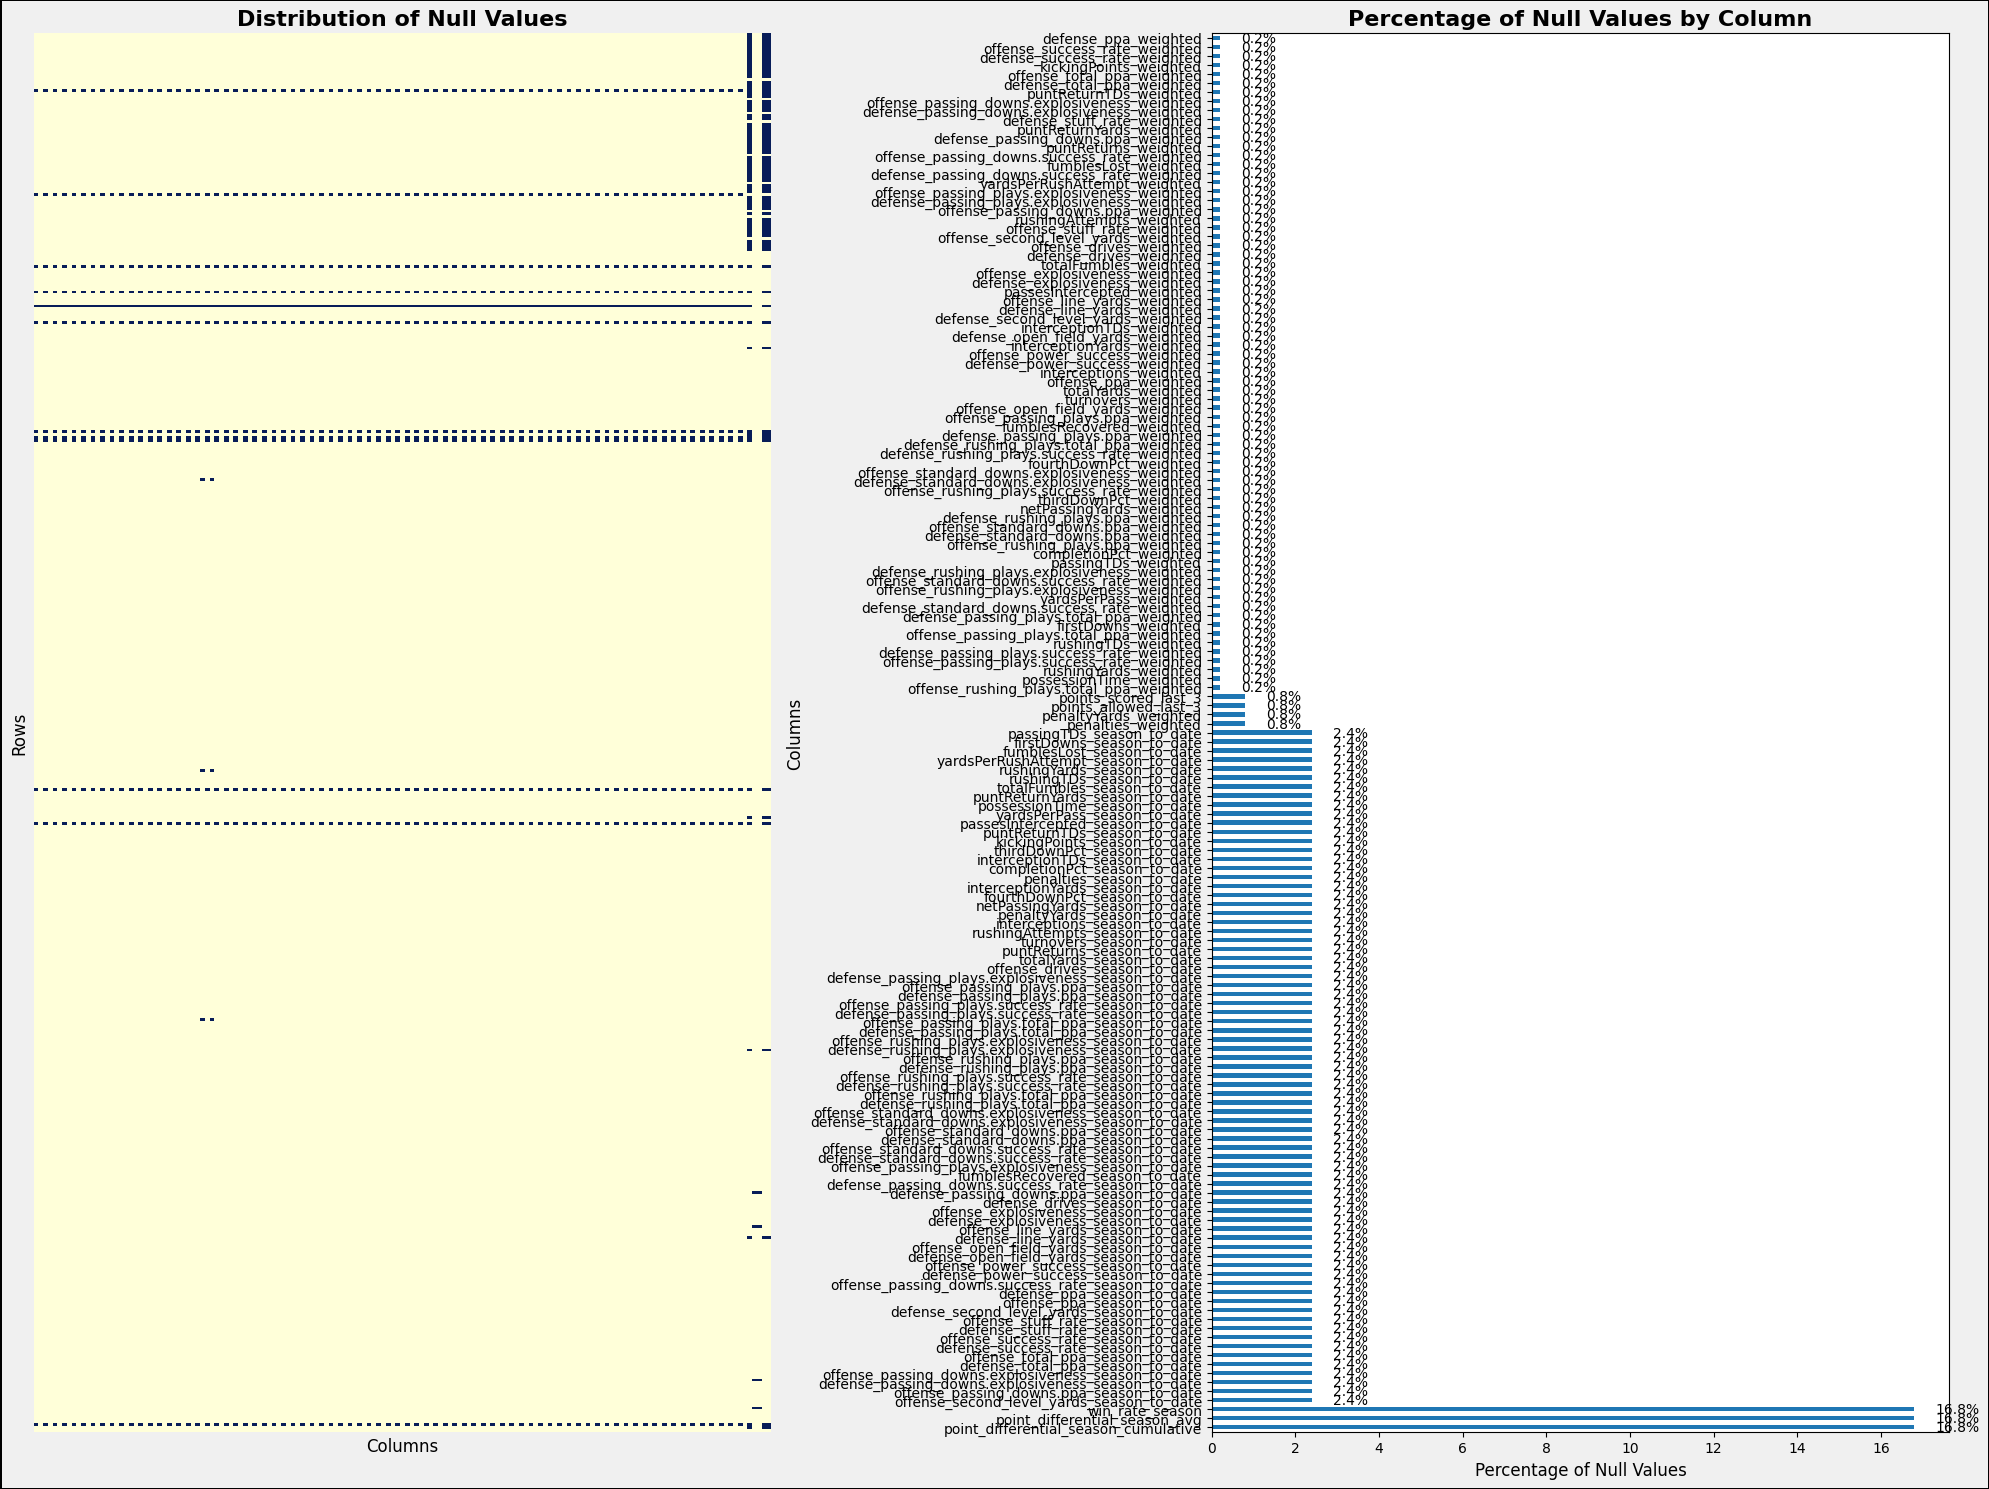

Columns with null values (sorted by percentage, descending):
point_differential_season_cumulative: 84 null values (16.80%)
point_differential_season_avg: 84 null values (16.80%)
win_rate_season: 84 null values (16.80%)
offense_second_level_yards_season_to_date: 12 null values (2.40%)
offense_passing_downs.ppa_season_to_date: 12 null values (2.40%)
defense_passing_downs.explosiveness_season_to_date: 12 null values (2.40%)
offense_passing_downs.explosiveness_season_to_date: 12 null values (2.40%)
defense_total_ppa_season_to_date: 12 null values (2.40%)
offense_total_ppa_season_to_date: 12 null values (2.40%)
defense_success_rate_season_to_date: 12 null values (2.40%)
offense_success_rate_season_to_date: 12 null values (2.40%)
defense_stuff_rate_season_to_date: 12 null values (2.40%)
offense_stuff_rate_season_to_date: 12 null values (2.40%)
defense_second_level_yards_season_to_date: 12 null values (2.40%)
offense_ppa_season_to_date: 12 null values (2.40%)
defense_ppa_season_to_date: 12 nu

In [72]:
visualize_null_values(df_random_preprocessed)

In [59]:
df_random['points_last_3'] = (
    df_random.sort_values(by=['team_id', 'start_date'], ascending=False)
    .groupby('team_id')['team_points']
    .rolling(window=3, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

# Shift the result to align with future games
df_random['points_last_3'] = df_random.groupby('team_id')['points_last_3'].shift()

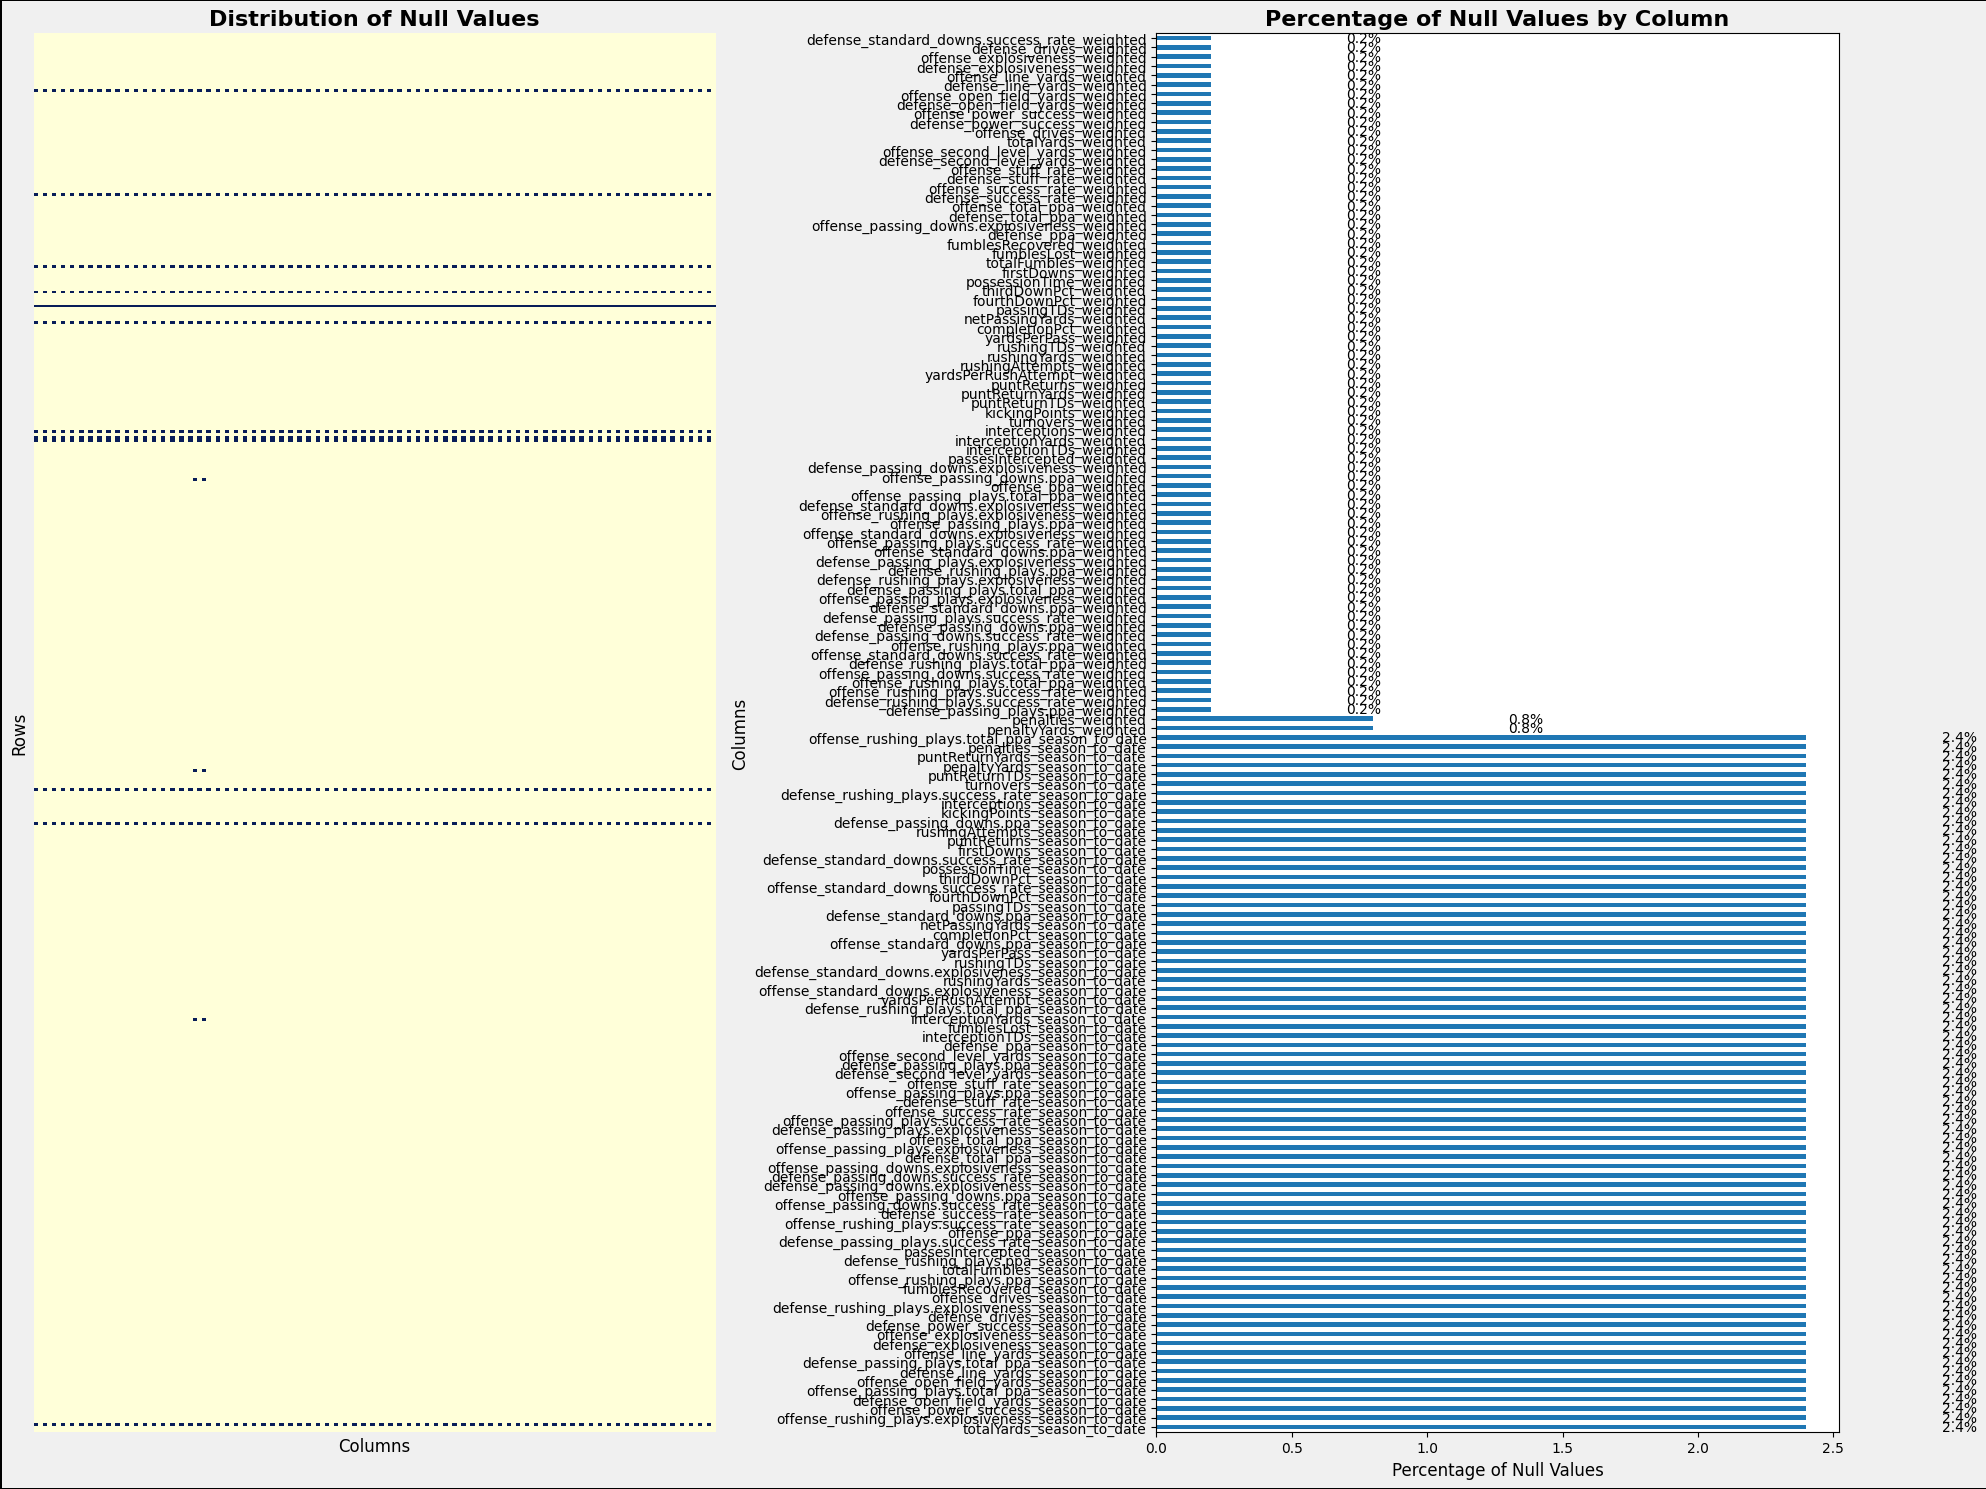

Columns with null values (sorted by percentage, descending):
totalYards_season_to_date: 12 null values (2.40%)
offense_rushing_plays.explosiveness_season_to_date: 12 null values (2.40%)
offense_power_success_season_to_date: 12 null values (2.40%)
defense_open_field_yards_season_to_date: 12 null values (2.40%)
offense_passing_plays.total_ppa_season_to_date: 12 null values (2.40%)
offense_open_field_yards_season_to_date: 12 null values (2.40%)
defense_line_yards_season_to_date: 12 null values (2.40%)
defense_passing_plays.total_ppa_season_to_date: 12 null values (2.40%)
offense_line_yards_season_to_date: 12 null values (2.40%)
defense_explosiveness_season_to_date: 12 null values (2.40%)
offense_explosiveness_season_to_date: 12 null values (2.40%)
defense_power_success_season_to_date: 12 null values (2.40%)
defense_drives_season_to_date: 12 null values (2.40%)
defense_rushing_plays.explosiveness_season_to_date: 12 null values (2.40%)
offense_drives_season_to_date: 12 null values (2.40%)
f

In [63]:
visualize_null_values(df_random)